In [26]:
## Libs

import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import pandas as pd
from scipy.stats import linregress

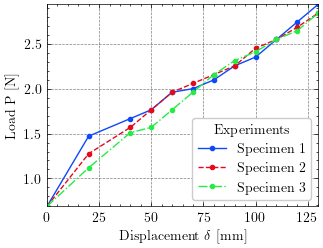

In [27]:
## Plots

plt.style.use(['science','grid','high-vis'])

data= pd.read_csv(r"Experiments.csv",delimiter=';') 
df = pd.DataFrame(data, columns=["d [mm]", "P_S1 [N]","P_S2 [N]","P_S3 [N]"])

#print(df['P_S1 [N]'])
#print(data)

fig, ax = plt.subplots()
ax.plot(df['d [mm]'], df['P_S1 [N]'], label='Specimen 1',marker='.')
ax.plot(df['d [mm]'], df['P_S2 [N]'], label='Specimen 2',marker='.')
ax.plot(df['d [mm]'], df['P_S3 [N]'], label='Specimen 3',marker='.')
ax.autoscale(tight=True)

ax.legend(title='Experiments')

pparam = dict(xlabel=r'Displacement $\delta$ [mm]', ylabel=r'Load P [N]')
ax.set(**pparam)
fig.savefig('load_disp.jpg', dpi=300)

In [28]:
def calculate_slope(x, y):
    slope, _, _, _, _ = linregress(x, y)
    return slope

# Plot and calculate slopes
slopes = []

for i, specimen in enumerate(["P_S1 [N]", "P_S2 [N]", "P_S3 [N]"]):
    displacement = df['d [mm]']
    load = df[specimen]
    
    # Calculate slope using linear regression
    slope = calculate_slope(displacement, load)/2
    slopes.append(slope)
    
# Calculate average slope
average_slope = np.mean(slopes)
std_dev_slope = np.std(slopes)

# Calculate average slope and standard deviation
average_slope = np.mean(slopes)
std_dev_slope_percentage = (np.std(slopes) / np.abs(average_slope)) * 100

# Print average slope and standard deviation as a percentage
print(f'The average slope is: {average_slope}')
print(f'The standard deviation of slopes is: {std_dev_slope_percentage:.2f}%')


The average slope is: 0.007722336605890604
The standard deviation of slopes is: 3.53%


In [29]:
print(slopes)

[0.007428357643758767, 0.007654001402524545, 0.0080846507713885]
